In [1]:
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd 

In [2]:
data_set= pd.read_csv(r'C:\Users\Vinod\Desktop\major project\stocks\google_stocks.csv')  
data_set.dropna(axis='columns')

data_set.fillna(0, inplace=True)
data_set

,Unnamed: 0,Unnamed: 0.1,Date,Open,High,Low,Close,Volume,Trend,Close_10,Future Trend,Total score
0,0,0,20141231,537.739990,538.400024,530.200012,530.659973,1232400,-1,504.010010,-1,67
1,1,1,20150102,532.599976,535.799988,527.880005,529.549988,1324000,-1,510.459992,-1,77
2,2,2,20150105,527.150024,527.989990,517.750000,519.460022,2059100,-1,509.940002,-1,152
3,3,3,20150106,520.500000,521.210022,505.549988,506.640015,2722800,-1,520.390015,1,188
4,4,4,20150107,510.950012,511.489990,503.649994,505.149994,2345900,-1,537.299988,1,286
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1158,1158,20190808,1186.430054,1206.280029,1174.000000,1206.189941,1505800,1,1153.580000,-1,66
1159,1159,1159,20190809,1199.989990,1204.459961,1184.890015,1188.900024,1020900,-1,1171.180000,-1,77
1160,1160,1160,20190812,1180.000000,1185.609985,1168.719971,1174.500000,1103200,-1,1170.820000,-1,102
1161,1161,1161,20190813,1174.349976,1205.430054,1172.989990,1196.729980,1421700,1,1173.750000,-1,136


In [3]:
feature_df = data_set[['Trend','Total score']]


x = np.asarray(feature_df)

y = np.asarray(data_set['Future Trend'])


No handles with labels found to put in legend.


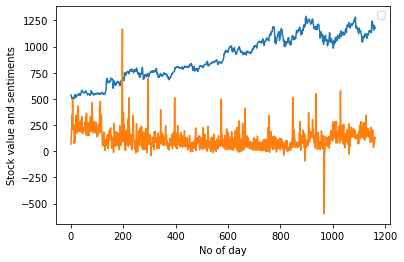

In [14]:
mtp.plot(data_set['Unnamed: 0'],data_set['Open'],data_set['Total score'])
mtp.xlabel("No of day")
mtp.ylabel("Stock value and sentiments")
mtp.legend()

In [5]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [10]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 20, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([ 1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1,  1, -1,  1,  1

In [12]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[33, 59],
       [53, 88]], dtype=int64)

In [13]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.51931330472103
